*****Mini Project 3*****

*Customer segmentation using ML algorithms*

*****Buisness context*****

A retail company has run six marketing campaigns, but the success of these campaigns has been minimal and has not improved the company's revenue. An examination of the results shows that less than 15% of customers accepted the promotion in the first five campaigns, and less than 20% in the last promotion campaign.

The business now needs to run its next promotion campaign and has identified that, rather than using a general approach, a targeted marketing effort is necessary to increase sales. To achieve this, they need to identify their customers and categorize them into groups that share similar attributes.



In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import random
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
import seaborn as sns
from datetime import datetime 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from kmodes.kprototypes import KPrototypes
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from pandas.plotting import parallel_coordinates
from sklearn.decomposition import PCA

In [2]:
#Importing Data
df= pd.read_csv(r"C:\Users\user\Downloads\archive\marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
#Examining Data frame
df.shape


(2240, 29)

In [4]:
#Examining Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i


****Feature Description****

***People***

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

***Products***
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

***Promotion***

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

***Place***

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month


In [5]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

****Cleaning and wranglind Data frame****

- Drop z contact and z revenue 

These two columns do not give rich data into dataframe and does not mean anything as their is no description to the column and also the figure is the same fro each row.Hence drop these columns.

- Drop rows with null values in income column
  
Income column made significant contribution to the when clustering. Rather than imputing missing values, decision made to drop those rows for maintain the quality of the dataframe. Further it will not affect to overall performance as it is only 24 rows and it is 1% from original data frame.

- Dt_Customer column change
  
Dt_customer column showing as object and recreating it with correct date format for feature engineering at later stage

- checking outliers and imputation logically
  
Removed the outlier from income column, considering the shown outliers, removed only extreme values from income column

- Categorize education into 4 values
  
Education column has 5 variables, Imputation done to merge two variables Basic and 2n Cycle, based on the additional feature information

- Categorize marital status into 4 values
  
Marital status column has 8 values. I have dropped YOLO and absurb variable values as it doesn't make any sense, dropping those two rows wouldn't make significant impact as it is only 4 columns together. Replace alone with single.

In [6]:
#Drop columns from dataframe
df1 = df.drop(columns=['Z_CostContact', 'Z_Revenue','ID'])

#Drop rows with null valuies in dataframe
df2 = df1.dropna(subset=['Income'])

#Dt_custome column change to date type format
df2["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")


C:\Users\user\AppData\Local\Temp\ipykernel_6968\698177381.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")


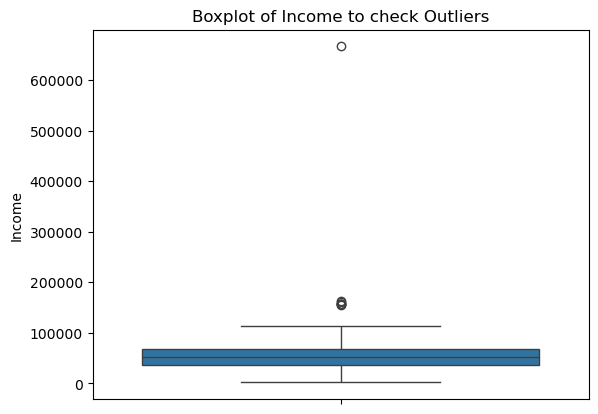

In [7]:
#Checking outliers of certain columns using boxplot
plt.title("Boxplot of Income to check Outliers")
sns.boxplot(df2["Income"])
plt.show()

Extreame outliers removed from dataframe by removing values higher than 3000000

In [8]:
# Filter out rows where 'Income' is greater than 300,000
df3 = df2[df2['Income'] <= 300000]


In [9]:
#categorize education into 4 variables
#Examining education Column
education_values = df['Education'].unique()
education_values

# Replace '2n Cycle' with 'Basic' in the 'Education' column
df3['Education'].replace('2n Cycle', 'Basic', inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_6968\4155325781.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Education'].replace('2n Cycle', 'Basic', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_6968\4155325781.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Education'].replace('2n Cycle', 'Basic', inplace=True)


In [10]:
#categorize Marital_Status into 4 variables
#Examining Marital_Status Column
Marital_Status_values = df['Marital_Status'].unique()
Marital_Status_values

# Replace 'Alone' with 'Single' in the 'Marital_Status' column
df3['Marital_Status'].replace('Alone', 'Single', inplace=True)

#Drop rows with values Absurd,YOLO
# List of values to drop
values_to_drop = ['Absurd', 'YOLO']

# Drop rows where 'Marital_Status' column is in values_to_drop
df4 = df3[~df3['Marital_Status'].isin(values_to_drop)]


C:\Users\user\AppData\Local\Temp\ipykernel_6968\3939271877.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Marital_Status'].replace('Alone', 'Single', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_6968\3939271877.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Marital_Status'].replace('Alone', 'Single', inplace=Tru

***Feature Engineering***

- Create new feature 'age' from Year_Birth
- Create new feature 'MonthsAsCustomer' from Dt customer 
- Create new feature 'MntTotal' from summing up all the products 

In [11]:
#Create an age column
# Calculate current year
current_year = datetime.now().year

# Calculate age from 'YearOfBirth'
df4['Age'] = current_year - df4['Year_Birth']


C:\Users\user\AppData\Local\Temp\ipykernel_6968\2430880763.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Age'] = current_year - df4['Year_Birth']


In [12]:

# Calculate current date
current_date = datetime.now()

# Calculate number of months as a customer
df4['MonthsAsCustomer'] = (current_date - df4['Dt_Customer']) // pd.Timedelta(days=30)
df4.head()

C:\Users\user\AppData\Local\Temp\ipykernel_6968\3776518414.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['MonthsAsCustomer'] = (current_date - df4['Dt_Customer']) // pd.Timedelta(days=30)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,MonthsAsCustomer
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,1,67,144
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,0,70,126
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,0,59,132
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,0,40,126
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,0,43,127


In [13]:
#Drop Year_Birth columns from dataframe
df5 = df4.drop(columns=['Year_Birth','Dt_Customer'])


In [14]:
#Creating a column Total spending of last 2 years
# Create 'MntTotal' column
df5['MntTotal'] = df5[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntGoldProds','MntSweetProducts']].sum(axis=1)


****Exploratory Data Analysis****

**Exploring categorical variables**

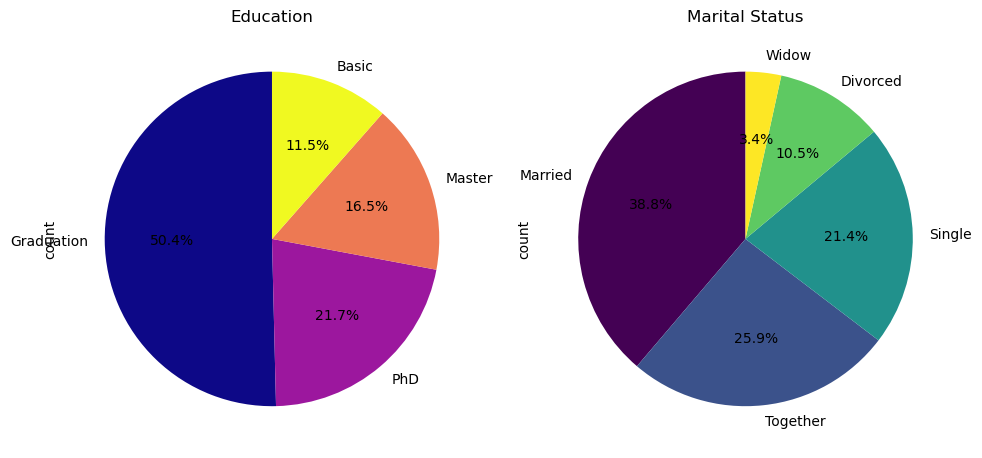

In [15]:
# Create pie charts for Education and Marital_Status
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Education pie chart
df5['Education'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=90, colormap='plasma', title='Education')

# Marital Status pie chart
df5['Marital_Status'].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=90, colormap='viridis', title='Marital Status')

plt.tight_layout()
plt.show()

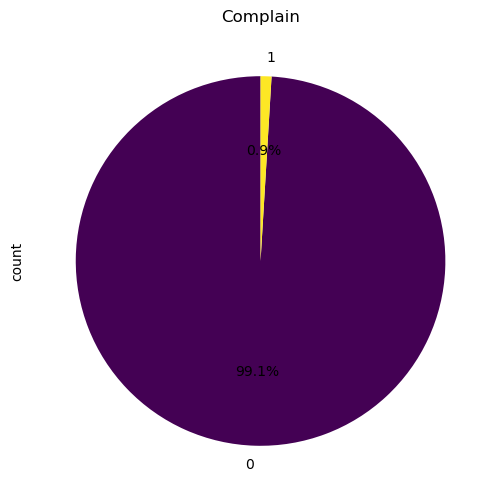

In [16]:
# Complain pie chart

# Define axes
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

# Plotting pie chart for 'Complain' column
df5['Complain'].value_counts().plot.pie(ax=axes, autopct='%1.1f%%', startangle=90, colormap='viridis', title='Complain')

plt.show()

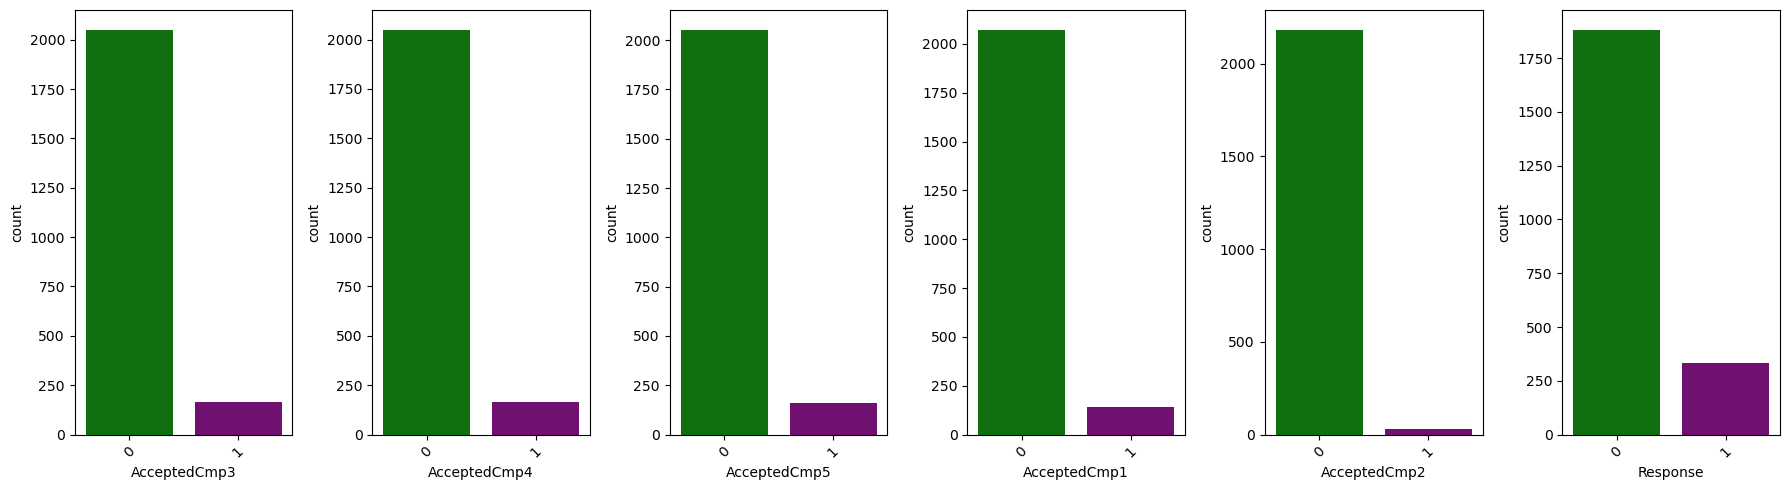

In [17]:
# Define the promotion features
promo_fea = ('AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Response')

# Define consistent colors for bars representing 0 and 1
colors = ['green', 'purple']  # Blue for 0, Orange for 1

# Create subplots
fig, ax = plt.subplots(1, len(promo_fea), figsize=(18, 5))

# Plot each promotion feature
for i, col in enumerate(promo_fea):
    sns.countplot(data=df5, x=col, hue=col, ax=ax[i],palette=colors,dodge=False, legend=False)
    ax[i].tick_params(axis='x', rotation=45)
   

plt.tight_layout()
plt.show()






**Exploring Numerical variables**

Exploring the dataframe reveals that Income and age follow a normal distribution within the customer base. The number of store visits remains consistent across customers. Total expenditure shows a positive skew, indicating that the majority spend less than 1250 units, though the distribution extends up to 2500 units. Analysis of expenditure across different categories shows that spending on fruits, fish products, sweet products, and Gold products is typically under 250 units, while expenditures on wine and meat products exhibit positive skewness with a tail extending up to 1750 units.
The product purchase pattern shows that deal purchases are more popular among customers, followed by catalog purchases. Store purchases and web purchases are within a similar range.



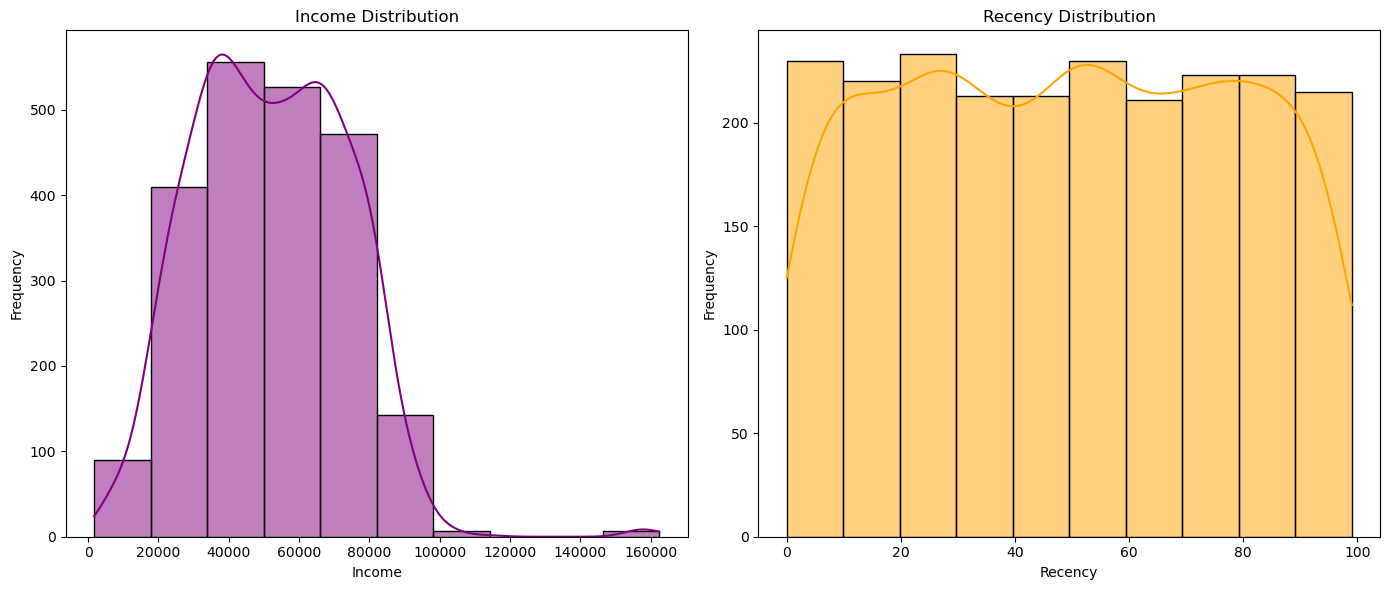

In [18]:

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for Income
sns.histplot(df5['Income'], bins=10, kde=True, color='purple', ax=axes[0])
axes[0].set_title('Income Distribution')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Frequency')

# Histogram for Recency
sns.histplot(df5['Recency'], bins=10, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Recency Distribution')
axes[1].set_xlabel('Recency')
axes[1].set_ylabel('Frequency')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

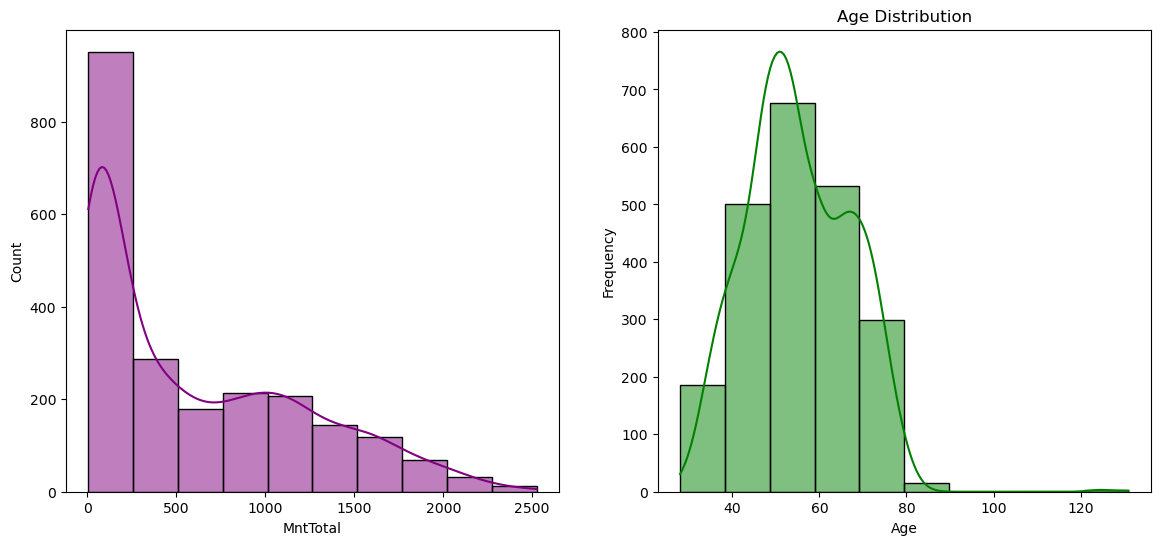

In [19]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for Total expence
sns.histplot(df5['MntTotal'], bins=10, kde=True, color='purple', ax=axes[0])
axes[1].set_title('Total expenditure Distribution')
axes[1].set_xlabel('MntTotal')
axes[1].set_ylabel('Frequency')


# Histogram for Age
sns.histplot(df5['Age'], bins=10, kde=True, color='green', ax=axes[1])
axes[1].set_title('Age Distribution')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

# Adjust layout and show plot

plt.show()

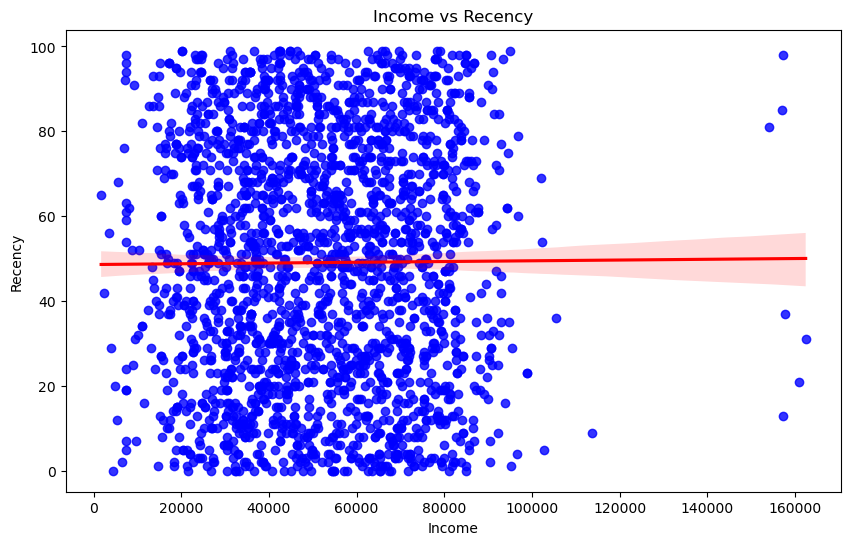

In [20]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Income', y='Recency', data=df5, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Income vs Recency')
plt.xlabel('Income')
plt.ylabel('Recency')
plt.show()

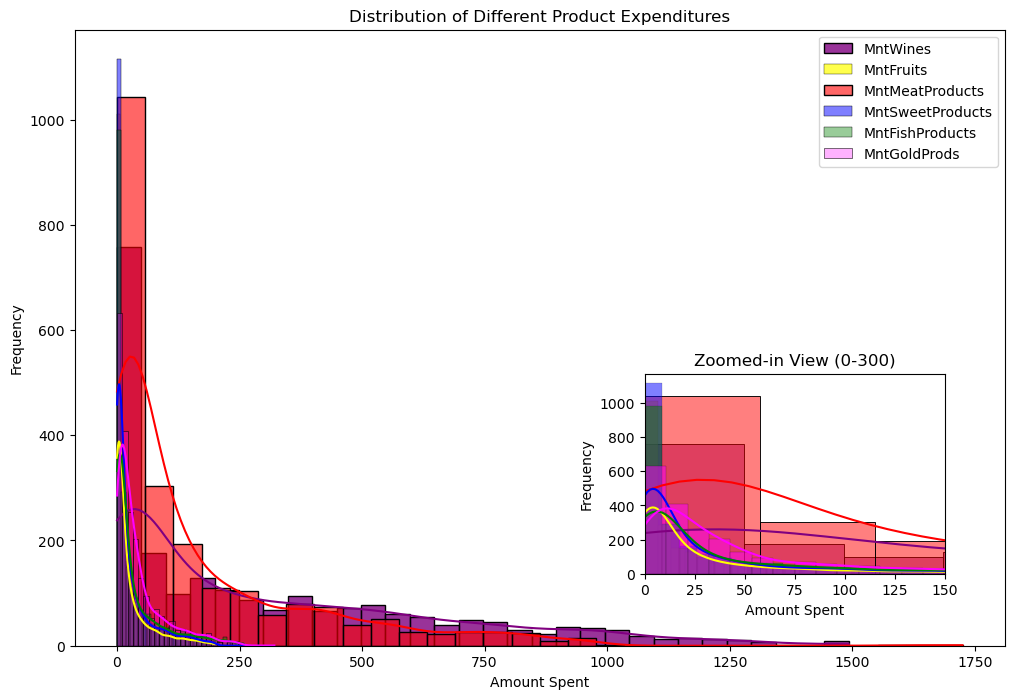

In [21]:
# Plotting the overlapping histograms
fig, ax = plt.subplots(figsize=(12, 8))

# Histogram for MntWines
sns.histplot(df5['MntWines'], bins=30, kde=True, color='purple', label='MntWines', alpha=0.8, ax=ax)

# Histogram for MntFruits
sns.histplot(df5['MntFruits'], bins=30, kde=True, color='yellow', label='MntFruits', alpha=0.7, ax=ax)

# Histogram for MntMeatProducts
sns.histplot(df5['MntMeatProducts'], bins=30, kde=True, color='red', label='MntMeatProducts', alpha=0.6, ax=ax)

# Histogram for MntSweetProducts
sns.histplot(df5['MntSweetProducts'], bins=30, kde=True, color='blue', label='MntSweetProducts', alpha=0.5, ax=ax)

# Histogram for MntFishProducts
sns.histplot(df5['MntFishProducts'], bins=30, kde=True, color='green', label='MntFishProducts', alpha=0.4, ax=ax)

# Histogram for MntGoldProds
sns.histplot(df5['MntGoldProds'], bins=30, kde=True, color='magenta', label='MntGoldProds', alpha=0.3, ax=ax)

ax.set_title('Distribution of Different Product Expenditures')
ax.set_xlabel('Amount Spent')
ax.set_ylabel('Frequency')
ax.legend()

# Inset plot for zoomed-in view
ax_inset = fig.add_axes([0.6, 0.2, 0.25, 0.25])  # Adjust the position and size as needed

# Histogram for MntWines (inset)
sns.histplot(df5['MntWines'], bins=30, kde=True, color='purple', label='MntWines', alpha=0.5, ax=ax_inset)

# Histogram for MntFruits (inset)
sns.histplot(df5['MntFruits'], bins=30, kde=True, color='yellow', label='MntFruits', alpha=0.5, ax=ax_inset)

# Histogram for MntMeatProducts (inset)
sns.histplot(df5['MntMeatProducts'], bins=30, kde=True, color='red', label='MntMeatProducts', alpha=0.5, ax=ax_inset)

# Histogram for MntSweetProducts (inset)
sns.histplot(df5['MntSweetProducts'], bins=30, kde=True, color='blue', label='MntSweetProducts', alpha=0.5, ax=ax_inset)

# Histogram for MntFishProducts (inset)
sns.histplot(df5['MntFishProducts'], bins=30, kde=True, color='green', label='MntFishProducts', alpha=0.5, ax=ax_inset)

# Histogram for MntGoldProds (inset)
sns.histplot(df5['MntGoldProds'], bins=30, kde=True, color='magenta', label='MntGoldProds', alpha=0.5, ax=ax_inset)

ax_inset.set_xlim(0, 150)
ax_inset.set_title('Zoomed-in View (0-300)')
ax_inset.set_xlabel('Amount Spent')
ax_inset.set_ylabel('Frequency')

plt.show()

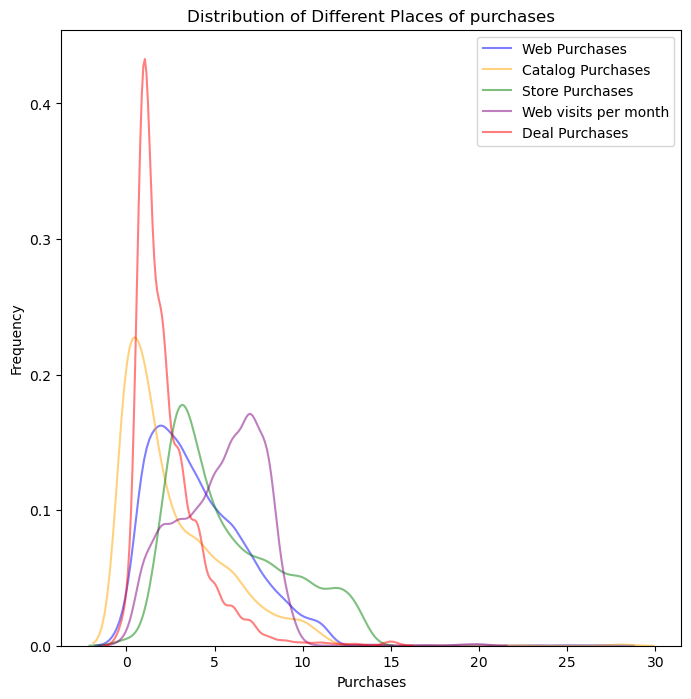

In [22]:
# Plotting the overlapping histograms
fig, ax = plt.subplots(figsize=(8, 8))

# Histogram for NumWebPurchases
sns.kdeplot(df5['NumWebPurchases'], color='blue', label='Web Purchases', alpha=0.5, ax=ax)

# Histogram for NumCatalogPurchases
sns.kdeplot(df5['NumCatalogPurchases'],color='orange', label='Catalog Purchases', alpha=0.5, ax=ax)

# Histogram for NumStorePurchases
sns.kdeplot(df5['NumStorePurchases'], color='green', label='Store Purchases', alpha=0.5, ax=ax)

# Histogram for NumWebVisitsMonth
sns.kdeplot(df5['NumWebVisitsMonth'],color='purple', label='Web visits per month', alpha=0.5, ax=ax)

# Histogram for NumDealsPurchases
sns.kdeplot(df5['NumDealsPurchases'],color='red', label='Deal Purchases', alpha=0.5, ax=ax)


ax.set_title('Distribution of Different Places of purchases')
ax.set_xlabel('Purchases')
ax.set_ylabel('Frequency')
ax.legend()

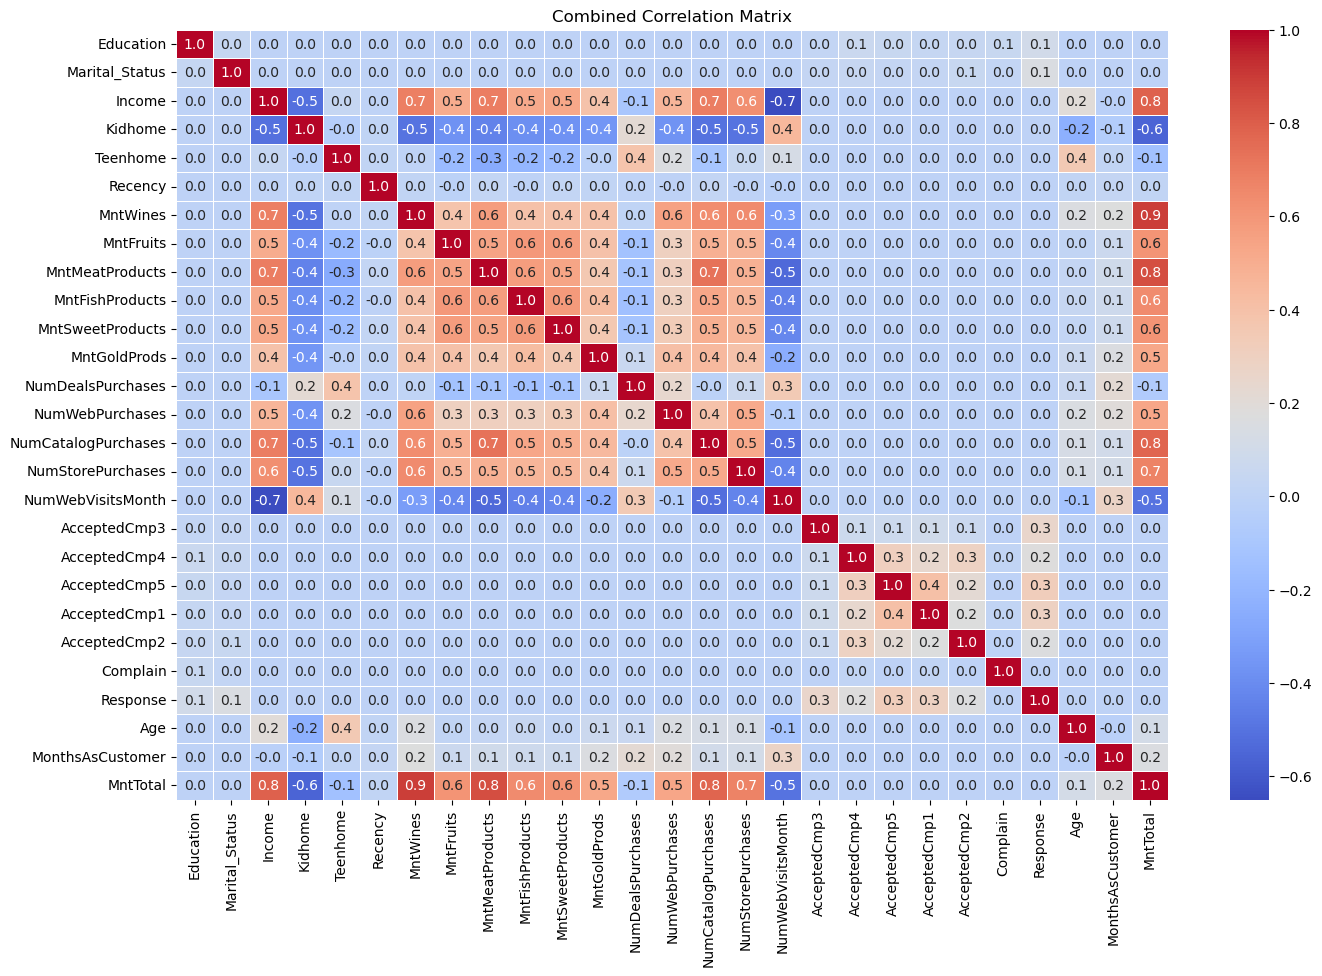

In [23]:
#Corelation Matrix 
#  function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

# Calculate Cramér's V for categorical columns
def categorical_corr(df, categorical_cols):
    corr_matrix = pd.DataFrame(np.zeros((len(categorical_cols), len(categorical_cols))), 
                               index=categorical_cols, columns=categorical_cols)
    for col1 in categorical_cols:
        for col2 in categorical_cols:
            if col1 == col2:
                corr_matrix.loc[col1, col2] = 1.0
            else:
                confusion_matrix = pd.crosstab(df[col1], df[col2])
                corr_matrix.loc[col1, col2] = cramers_v(confusion_matrix.values)
    return corr_matrix

# Define the features
categorical_features = ['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain']
numerical_features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds', 'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Age', 'MonthsAsCustomer', 'MntTotal']

# Calculate numerical correlation matrix
numerical_corr = df5[numerical_features].corr()

# Encode categorical variables for calculation
encoded_df = df5.copy()
for feature in categorical_features:
    encoded_df[feature] = LabelEncoder().fit_transform(encoded_df[feature])

# Calculate categorical correlation matrix
categorical_corr_matrix = categorical_corr(encoded_df, categorical_features)

# Initialize the full correlation matrix
full_corr_matrix = pd.DataFrame(np.zeros((len(df5.columns), len(df5.columns))), 
                                index=df5.columns, columns=df5.columns)

# Fill in the numerical correlation matrix
full_corr_matrix.loc[numerical_features, numerical_features] = numerical_corr

# Fill in the categorical correlation matrix
full_corr_matrix.loc[categorical_features, categorical_features] = categorical_corr_matrix

# Visualize the combined correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(full_corr_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
plt.title('Combined Correlation Matrix')
plt.show()

****Data Preprocessing****

Inorder to standerdize the data, standardscaler has used and apply for numerical data, Categorical features has encoded to use in the clustering algorithm together with numerical features. The combined dtaframe used to find the optimal K, using elbow method.

In [24]:
# Define the features
categorical_features = ['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain']
numerical_features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds', 'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Age', 'MonthsAsCustomer', 'MntTotal']

# Retain the original categorical columns and ensure they are categorical
original_categorical_df = df5[categorical_features].copy()
for feature in categorical_features:
    original_categorical_df[feature] = pd.Categorical(original_categorical_df[feature])

# Encode categorical features and set dtype as categorical
for feature in categorical_features:
    df5[feature] = pd.Categorical(df5[feature])

# Standard scale numerical features
scaler = StandardScaler()
df5[numerical_features] = scaler.fit_transform(df5[numerical_features])

# Encode categorical features to numerical values
for feature in categorical_features:
    df5[feature] = df5[feature].cat.codes

# Apply PCA on numerical features
pca = PCA(n_components=2)
numerical_pca = pca.fit_transform(df5[numerical_features])

# Combine PCA-transformed features with encoded categorical features
df_combined = np.hstack((numerical_pca, df5[categorical_features].values))

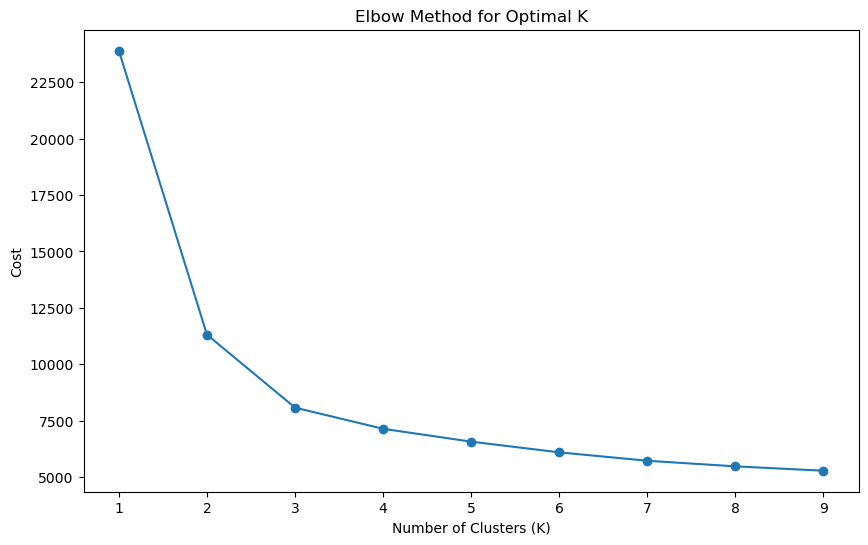

In [25]:
# Determine the optimal number of clusters using the Elbow method
k_values = range(1, 10)
costs = []

# Calculate the cost for each K
for k in k_values:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    clusters = kproto.fit_predict(df_combined, categorical=[i for i in range(numerical_pca.shape[1], df_combined.shape[1])])
    costs.append(kproto.cost_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, costs, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Cost')
plt.show()

****

****K-prototype clustering with 2 principal components****

In [54]:
# Determine the optimal K from the plot
optimal_k = 3  # Replace with the optimal K identified from the Elbow curve

# Perform K-Prototypes clustering with the optimal K
kproto = KPrototypes(n_clusters=optimal_k, init='Huang',n_init=10, verbose=2, random_state=42)
clusters = kproto.fit_predict(df_combined, categorical=[i for i in range(numerical_pca.shape[1], df_combined.shape[1])])

# Add cluster labels to the DataFrame
df5['clusters'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 344, ncost: 9098.767624618044
Run: 1, iteration: 2/100, moves: 291, ncost: 8318.273823910706
Run: 1, iteration: 3/100, moves: 158, ncost: 8121.5322410190465
Run: 1, iteration: 4/100, moves: 71, ncost: 8084.517801071449
Run: 1, iteration: 5/100, moves: 25, ncost: 8078.748777501632
Run: 1, iteration: 6/100, moves: 18, ncost: 8074.701883934285
Run: 1, iteration: 7/100, moves: 15, ncost: 8073.173844509338
Run: 1, iteration: 8/100, moves: 6, ncost: 8072.92893553444
Run: 1, iteration: 9/100, moves: 1, ncost: 8072.905168312184
Run: 1, iteration: 10/100, moves: 0, ncost: 8072.905168312184
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 941, ncost: 8629.580556843068
Run: 2, iteration: 2/100, moves: 265, ncost: 8174.649489591547
Run: 2, iteration: 3/100, moves: 112, ncost: 8086.792256684482
Run: 2, iteration: 4/100, move

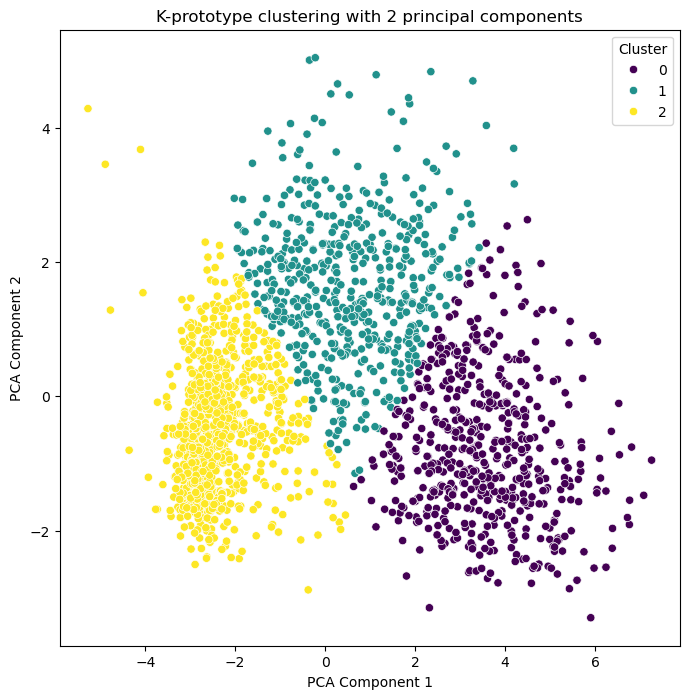

In [55]:
# Visualization of clusters using PCA components
plt.figure(figsize=(8, 8))
sns.scatterplot(x=numerical_pca[:, 0], y=numerical_pca[:, 1], hue=df5['clusters'], palette='viridis')
plt.title('K-prototype clustering with 2 principal components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [56]:
# Evaluate the clustering
sil_score = silhouette_score(df_combined, clusters, metric='euclidean')
db_index = davies_bouldin_score(df_combined, clusters)
ch_index = calinski_harabasz_score(df_combined, clusters)

print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Index: {db_index}')
print(f'Calinski-Harabasz Index: {ch_index}')

Silhouette Score: 0.3521742841777797
Davies-Bouldin Index: 1.1175789909555125
Calinski-Harabasz Index: 1780.6205678135336


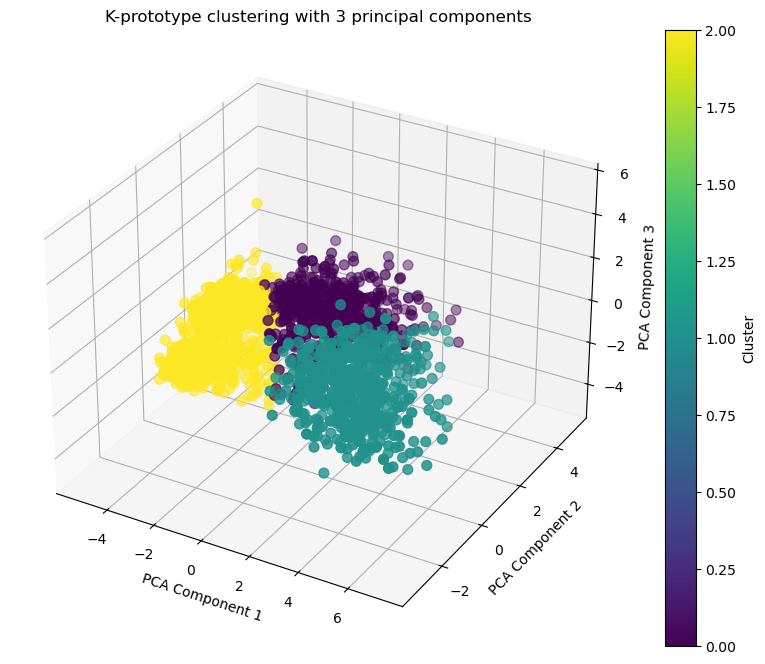

In [29]:
#Clustering with 3 PCA

# Apply PCA on numerical features
pca = PCA(n_components=3)  # Reduce to 3 components for 3D visualization
numerical_pca_3d = pca.fit_transform(df5[numerical_features])

# Combine PCA-transformed features with encoded categorical features
df_combined_3d = np.hstack((numerical_pca_3d, df5[categorical_features].values))

# Perform K-Prototypes clustering with the optimal K
optimal_k = 3  # Assuming you've determined the optimal K from the Elbow curve
kproto = KPrototypes(n_clusters=optimal_k, init='Huang', random_state=42)
clusters_3d = kproto.fit_predict(df_combined_3d, categorical=[i for i in range(numerical_pca_3d.shape[1], df_combined_3d.shape[1])])

# Add cluster labels to the DataFrame
df5['Cluster_3D'] = clusters_3d

# Visualization of clusters using 3 PCA components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(numerical_pca_3d[:, 0], numerical_pca_3d[:, 1], numerical_pca_3d[:, 2], c=df5['Cluster_3D'], cmap='viridis', s=50)
plt.title('K-prototype clustering with 3 principal components')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.colorbar(sc, ax=ax, label='Cluster')
plt.show()

In [30]:
# Evaluation Metrics
silhouette_avg = silhouette_score(df_combined_3d, clusters_3d)
davies_bouldin = davies_bouldin_score(df_combined_3d, clusters_3d)
calinski_harabasz = calinski_harabasz_score(df_combined_3d, clusters_3d)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')

Silhouette Score: 0.3039307873197923
Davies-Bouldin Index: 1.2711970165324027
Calinski-Harabasz Index: 1353.6210994294158


***Clustering with selected features***

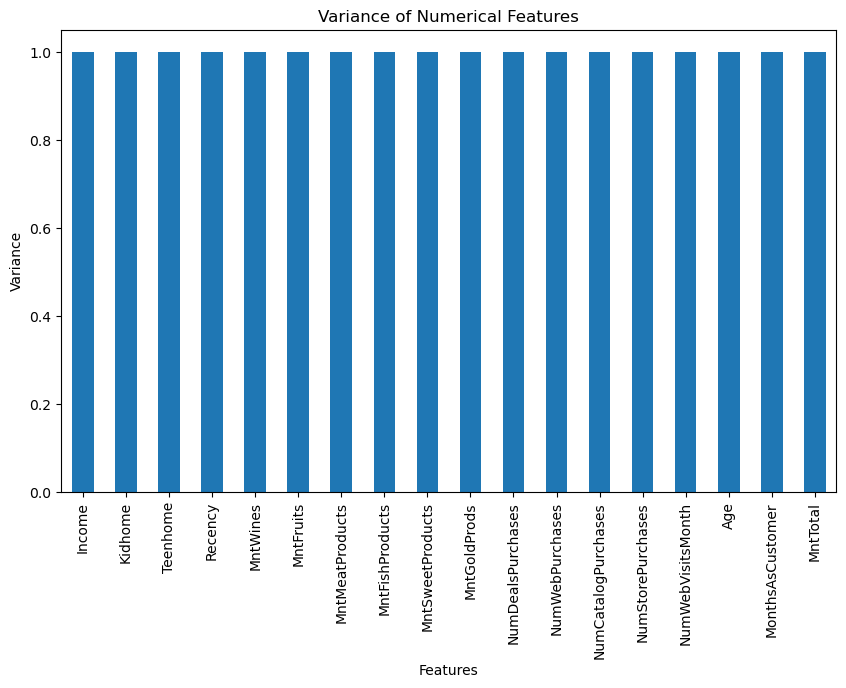

In [31]:
#Selecting features for clustering
#Use variance threshold to select numerical features for clustering

# Compute variances
variances = np.var(df5[numerical_features], axis=0)
variance_df = pd.DataFrame(variances, index=numerical_features, columns=['Variance'])

# Plot the variances
plt.figure(figsize=(10, 6))
variance_df['Variance'].plot(kind='bar')
plt.title('Variance of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.show()

Since their is no variance of the features (Standardization of the numerical data might have reduce the variability of the data), It is not useful to apply variance threshold for feature selection.Therefor as a method of feature selection, I will use correlation matrix and remove highly correlated features

In [32]:
# Define categorical and numerical features
categorical_features1 = ['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']
numerical_features1 = ['Income', 'Kidhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'NumCatalogPurchases', 'MonthsAsCustomer']

# Subset your dataframe with selected features
df_subset1 = df5[categorical_features1 + numerical_features1].copy()

# Standardize numerical features
scaler = StandardScaler()
df_subset1[numerical_features1] = scaler.fit_transform(df_subset1[numerical_features1])

# Encode categorical features
for feature in categorical_features1:
    df_subset1[feature] = df_subset1[feature].astype('category').cat.codes

# Perform PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
numerical_pca_1 = pca.fit_transform(df_subset1[numerical_features1])

#Combine PCA-transformed features with encoded categorical features
df_combined_1=np.hstack((numerical_pca_1, df_subset1[categorical_features1].values))


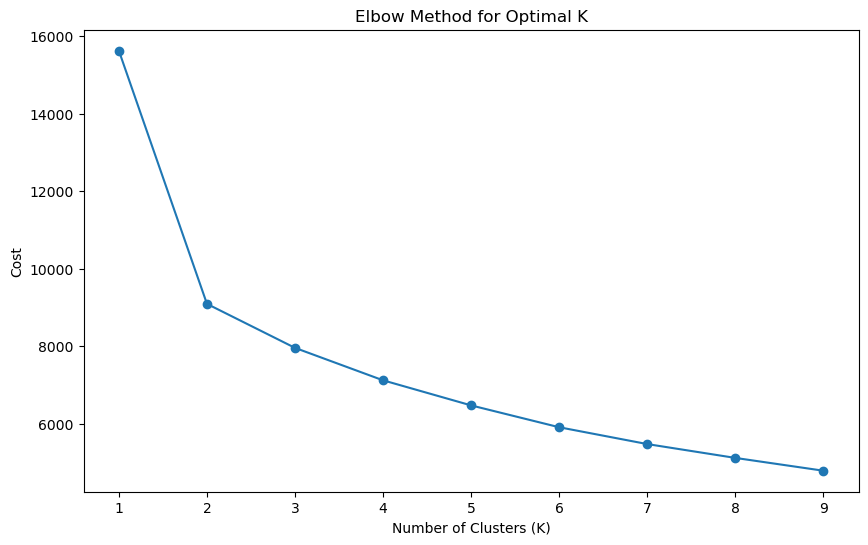

In [33]:
# Determine the optimal number of clusters using the Elbow method
k_values = range(1, 10)
costs = []

# Calculate the cost for each K
for k in k_values:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    clusters = kproto.fit_predict(df_combined_1, categorical=[i for i in range(df_subset1[numerical_features1].shape[1], df_combined_1.shape[1])])
    costs.append(kproto.cost_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, costs, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Cost')
plt.show()

In [34]:
# Determine the optimal K from the plot
optimal_k = 2  # Replace with the optimal K identified from the Elbow curve

# Perform K-Prototypes clustering with the optimal K
kproto = KPrototypes(n_clusters=optimal_k, init='Huang',n_init=10, verbose=2, random_state=42)
clusters_1 = kproto.fit_predict(df_combined_1, categorical=[i for i in range(numerical_pca_1.shape[1], df_combined_1.shape[1])])

# Convert df_combined_1 back to a pandas DataFrame
df_combined_1_df = pd.DataFrame(df_combined_1, columns=[f'PCA_{i+1}' for i in range(numerical_pca_1.shape[1])] + categorical_features1)
df_combined_1_df['clusters'] = clusters_1

# Evaluate the clustering
sil_score = silhouette_score(df_combined_1, clusters, metric='euclidean')
db_index = davies_bouldin_score(df_combined_1, clusters)
ch_index = calinski_harabasz_score(df_combined_1, clusters)

print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Index: {db_index}')
print(f'Calinski-Harabasz Index: {ch_index}')

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 914, ncost: 6556.451248413218
Run: 1, iteration: 2/100, moves: 182, ncost: 6356.190732286242
Run: 1, iteration: 3/100, moves: 23, ncost: 6353.266275320552
Run: 1, iteration: 4/100, moves: 7, ncost: 6352.956915744194
Run: 1, iteration: 5/100, moves: 0, ncost: 6352.956915744194
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 78, ncost: 6354.124657597479
Run: 2, iteration: 2/100, moves: 14, ncost: 6352.96265590599
Run: 2, iteration: 3/100, moves: 1, ncost: 6352.956915744195
Run: 2, iteration: 4/100, moves: 0, ncost: 6352.956915744195
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 379, ncost: 6374.70912921721
Run: 3, iteration: 2/100, moves: 58, ncost: 6354.161033911475
Run: 3, iteration: 3/100, moves: 12, ncost: 6353.0151720394715
Run: 3, iteration:

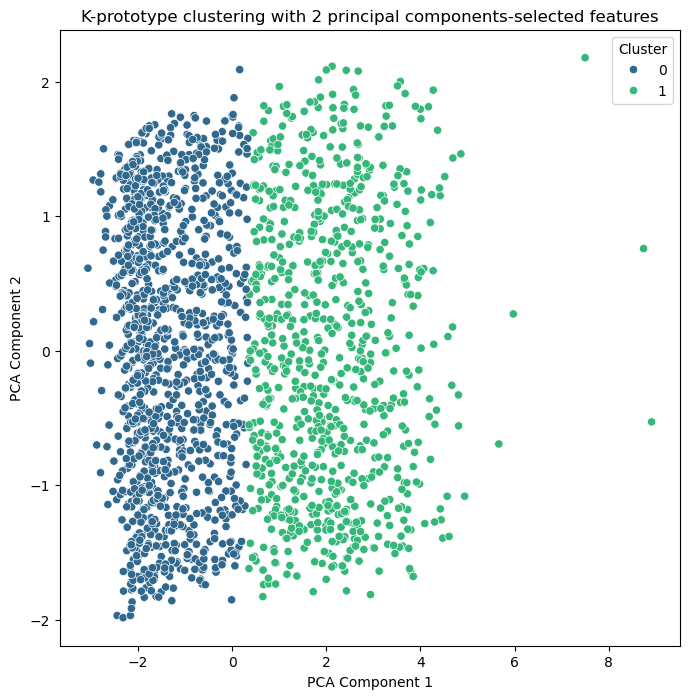

In [35]:
# Visualization of clusters using PCA components
plt.figure(figsize=(8, 8))
sns.scatterplot(x=numerical_pca_1[:, 0], y=numerical_pca_1[:, 1], hue=df_combined_1_df['clusters'], palette='viridis')
plt.title('K-prototype clustering with 2 principal components-selected features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_6968\1117464156.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset[numerical_features] = scaler.fit_transform(df_subset[numerical_features])
C:\Users\user\AppData\Local\Temp\ipykernel_6968\1117464156.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset[feature] = df_subset[feature].astype('category').cat.codes


Silhouette Score: 0.22928752828713328
Davies-Bouldin Index: 1.4322283123772426
Calinski-Harabasz Index: 772.5773749827208


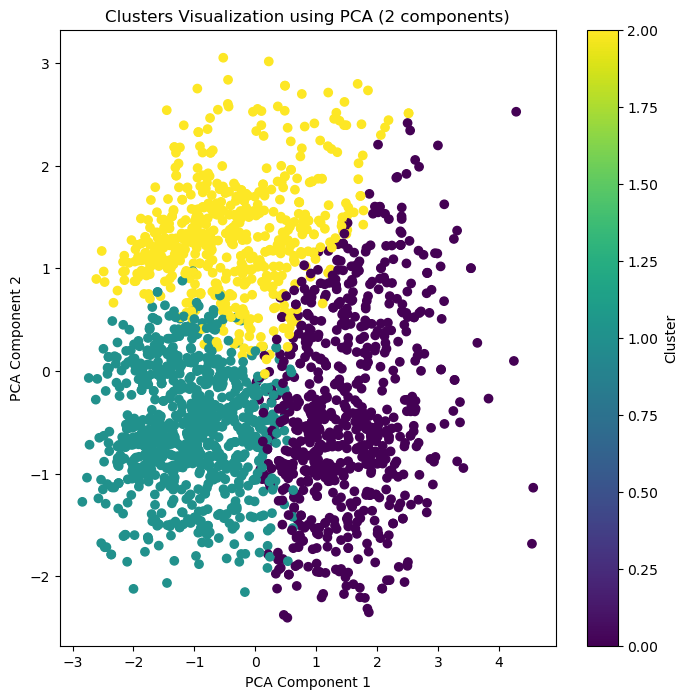

In [36]:
# Define categorical and numerical features
categorical_features = ['Education', 'Marital_Status', 'Response']
numerical_features = ['Income', 'Recency', 'Age', 'MntTotal']

# Subset your dataframe with selected features
df_subset = df5[categorical_features + numerical_features]

# Standardize numerical features
scaler = StandardScaler()
df_subset[numerical_features] = scaler.fit_transform(df_subset[numerical_features])

# Encode categorical features
for feature in categorical_features:
    df_subset[feature] = df_subset[feature].astype('category').cat.codes

# Perform PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_subset)

# Combine PCA components with categorical data
combined_data = np.hstack((pca_components, df_subset.to_numpy()))


# Fit K-Prototypes model
optimal_k = 3  # Placeholder for optimal K, determined using your method
kproto = KPrototypes(n_clusters=optimal_k, init='Huang', random_state=42)
clusters = kproto.fit_predict(combined_data, categorical=[0, 1, 2])  # Specify indices of categorical features

# Evaluate the clustering (optional)
sil_score = silhouette_score(combined_data, clusters, metric='euclidean')
db_index = davies_bouldin_score(combined_data, clusters)
ch_index = calinski_harabasz_score(combined_data, clusters)

print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Index: {db_index}')
print(f'Calinski-Harabasz Index: {ch_index}')

# Visualize the clusters in 2D
plt.figure(figsize=(8, 8))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters Visualization using PCA (2 components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_6968\1085896655.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset2['Cluster'] = kmeans.labels_


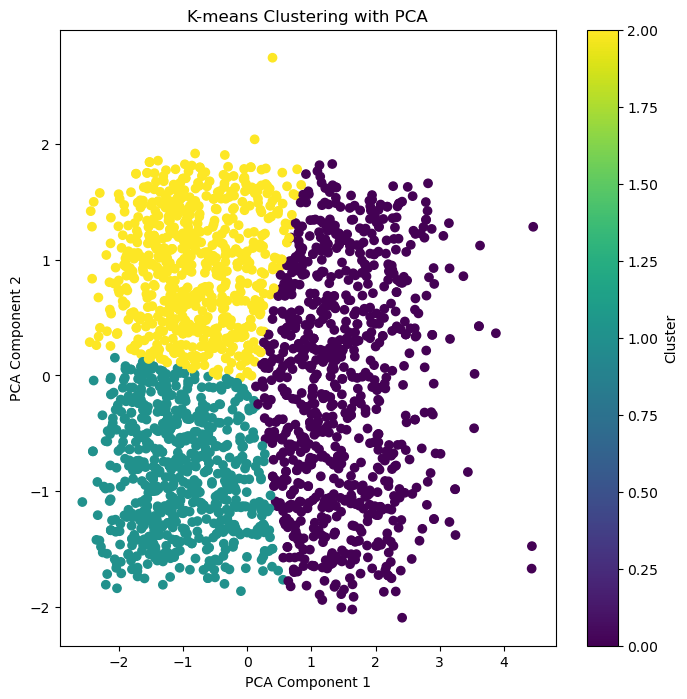

In [37]:
# Subset the dataframe with selected features
df_subset2 = df5[numerical_features]

# Standardize numerical data
scaler = StandardScaler()
scaled_data_1 = scaler.fit_transform(df_subset2)

# Apply PCA on numerical features
pca = PCA(n_components=2)  
numerical_pca = pca.fit_transform(scaled_data_1)

# Initialize K-means with a chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit K-means clustering model
kmeans.fit(numerical_pca)

# Get cluster labels
df_subset2['Cluster'] = kmeans.labels_

# Visualize the clusters using PCA-transformed data
plt.figure(figsize=(8, 8))
plt.scatter(numerical_pca[:, 0], numerical_pca[:, 1], c=df_subset2['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering with PCA')
plt.colorbar(label='Cluster')
plt.show()

In [38]:
# Evaluate the clustering (
sil_score = silhouette_score(df_subset2, clusters, metric='euclidean')
db_index = davies_bouldin_score(df_subset2, clusters)
ch_index = calinski_harabasz_score(df_subset2, clusters)

print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Index: {db_index}')
print(f'Calinski-Harabasz Index: {ch_index}')

Silhouette Score: 0.12726532447940245
Davies-Bouldin Index: 3.2153771312419885
Calinski-Harabasz Index: 658.156723440578


In [39]:
df5.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,MonthsAsCustomer,MntTotal,clusters,Cluster_3D
0,1,2,0.287186,-0.823833,-0.929251,0.308880,0.977138,1.550236,1.689364,2.464856,...,0,0,0,0,1,0.985521,1.548412,1.674885,0,1
1,1,2,-0.260584,1.038636,0.908472,-0.382313,-0.871463,-0.636741,-0.717884,-0.651262,...,0,0,0,0,0,1.235922,-1.113979,-0.961705,1,2
2,1,3,0.913030,-0.823833,-0.929251,-0.797029,0.357975,0.569867,-0.178482,1.346720,...,0,0,0,0,0,0.317786,-0.226515,0.280311,0,1
3,1,3,-1.175454,1.038636,-0.929251,-0.797029,-0.871463,-0.561328,-0.655474,-0.504621,...,0,0,0,0,0,-1.268085,-1.113979,-0.918591,1,2
4,3,1,0.294385,1.038636,-0.929251,1.553027,-0.391538,0.419041,-0.218603,0.155263,...,0,0,0,0,0,-1.017684,-0.966068,-0.306703,1,2


In [57]:
# Function to calculate centroids for numerical features
def calculate_numerical_centroids(df, clusters, numerical_features):
    centroids = []
    for cluster in sorted(df['clusters'].unique()):
        centroid = df[df['clusters'] == cluster][numerical_features].mean().values
        centroids.append(centroid)
    return np.array(centroids)

# Function to calculate centroids for categorical features
def calculate_categorical_centroids(df, clusters, categorical_features):
    centroids = []
    for cluster in sorted(df['clusters'].unique()):
        centroid = df[df['clusters'] == cluster][categorical_features].mode().iloc[0].values
        centroids.append(centroid)
    return np.array(centroids)

# Calculate centroids for numerical features
centroids_numerical = calculate_numerical_centroids(df5, clusters, numerical_features)

# Calculate centroids for categorical features
centroids_categorical = calculate_categorical_centroids(df5, clusters, categorical_features)

# Combine numerical and categorical centroids into a single DataFrame
centroid_data = {feature: centroids_numerical[:, idx] for idx, feature in enumerate(numerical_features)}
for idx, feature in enumerate(categorical_features):
    centroid_data[feature] = centroids_categorical[:, idx]

# Create centroid DataFrame
centroid_df = pd.DataFrame(centroid_data)

# Define a function to decode categorical centroids
def decode_categorical_centroids(centroid_df, categorical_features, df_original):
    decoded_centroid_df = centroid_df.copy()
    for feature in categorical_features:
        # Ensure df_original[feature] is categorical
        if isinstance(df_original[feature].dtype, pd.CategoricalDtype):
            # Get the original mapping from encoded values to original categorical values
            encoded_values = decoded_centroid_df[feature].astype(int)
            original_values = df_original[feature].cat.categories

            # Map encoded values back to original categorical values
            decoded_centroid_df[feature] = encoded_values.map(dict(zip(range(len(original_values)), original_values)))
        else:
            raise ValueError(f"Column '{feature}' in df_original is not categorical.")
    
    return decoded_centroid_df

# Decode categorical centroids
decoded_centroid_df = decode_categorical_centroids(centroid_df, categorical_features, original_categorical_df)

# Display decoded centroid dataframe
print("Decoded Centroid DataFrame:")
print(decoded_centroid_df)

Decoded Centroid DataFrame:
     Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  1.109364 -0.749334 -0.573958  0.008268  0.903855   1.055066   
1  0.241549 -0.336578  0.800929 -0.022322  0.447793  -0.143982   
2 -0.782484  0.626362 -0.117441  0.007775 -0.779108  -0.533384   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0         1.248422         1.109864          1.029133      0.648403  ...   
1        -0.155264        -0.162753         -0.123633      0.315194  ...   
2        -0.639655        -0.554717         -0.529757     -0.555504  ...   

   MntTotal  Education  Marital_Status  AcceptedCmp3  AcceptedCmp4  \
0  1.265934          1               1             0             0   
1  0.187227          1               1             0             0   
2 -0.843048          1               1             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  
0             0             0             0         0  

In [59]:
decoded_centroid_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,MntTotal,Education,Marital_Status,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
0,1.109364,-0.749334,-0.573958,0.008268,0.903855,1.055066,1.248422,1.109864,1.029133,0.648403,...,1.265934,1,1,0,0,0,0,0,0,0
1,0.241549,-0.336578,0.800929,-0.022322,0.447793,-0.143982,-0.155264,-0.162753,-0.123633,0.315194,...,0.187227,1,1,0,0,0,0,0,0,0
2,-0.782484,0.626362,-0.117441,0.007775,-0.779108,-0.533384,-0.639655,-0.554717,-0.529757,-0.555504,...,-0.843048,1,1,0,0,0,0,0,0,0


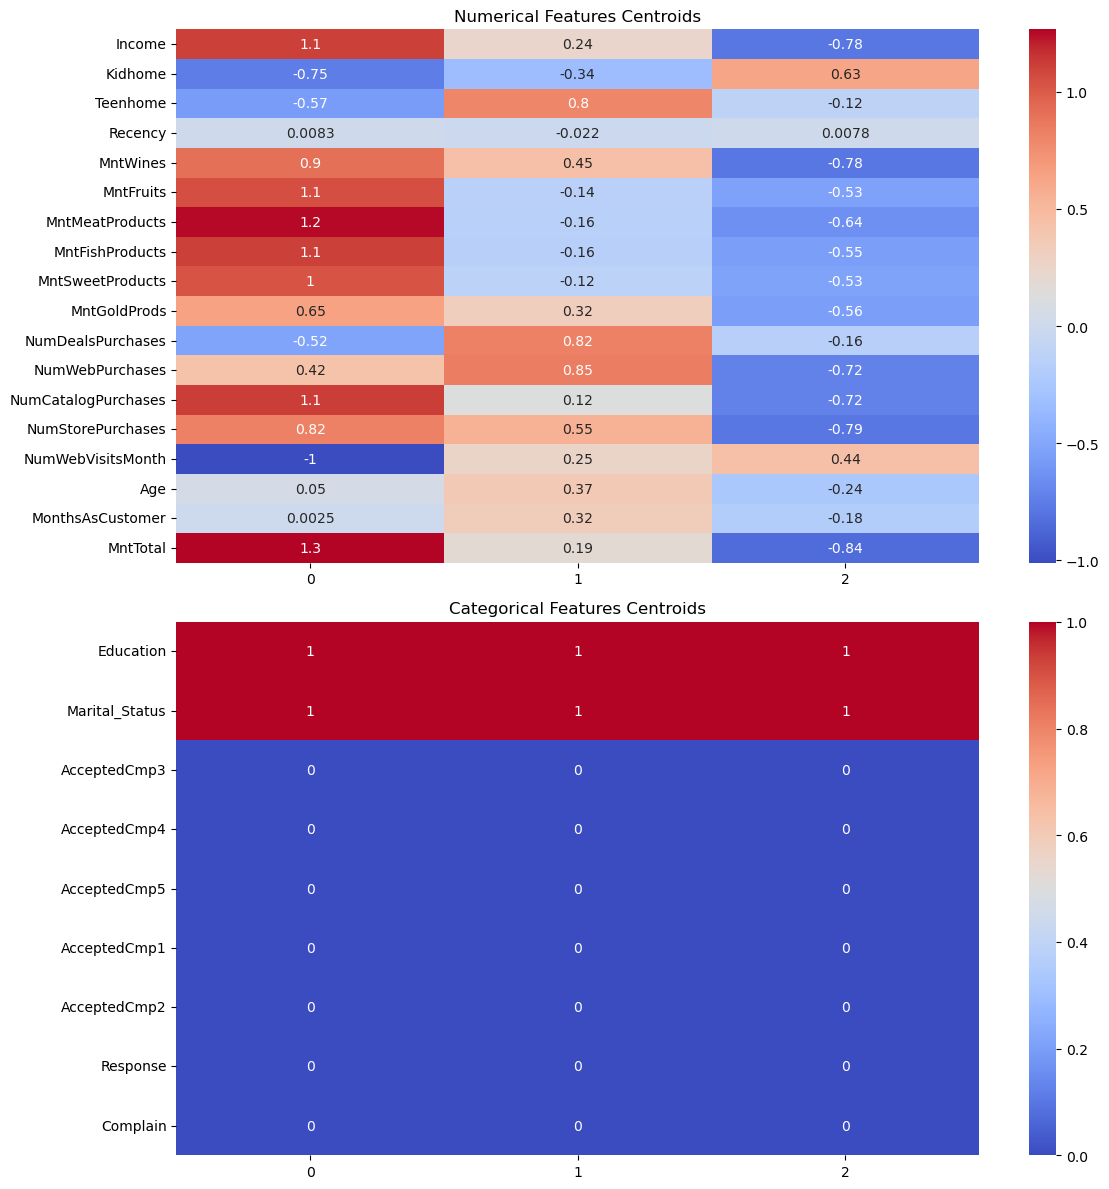

In [60]:
# Separate numerical and categorical features
numerical_data = decoded_centroid_df[numerical_features]
categorical_data = decoded_centroid_df[categorical_features]

# Create subplots for numerical and categorical features
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Numerical features heatmap
sns.heatmap(numerical_data.T, ax=axs[0], annot=True, cmap='coolwarm')
axs[0].set_title('Numerical Features Centroids')

# Categorical features heatmap
sns.heatmap(categorical_data.T, ax=axs[1], annot=True, cmap='coolwarm', fmt='g')
axs[1].set_title('Categorical Features Centroids')

plt.tight_layout()
plt.show()

***Evaluation of Models***

K prototype clustering with 2 principal components, is the best model being created and it's scores are higher.

Applying it back to the orginal dataframe provide with the clusters that can be identified independently.

Cluster 0:
Income: 1.109364 (Above average)
Kidhome: -0.749334 (Below average, fewer kids at home)
Teenhome: -0.573958 (Below average, fewer teenagers at home)
Recency: 0.008268 (Average recency of purchases)
MntWines: 0.903855 (Above average spending on wines)
MntFruits: 1.055066 (Above average spending on fruits)
MntMeatProducts: 1.248422 (Above average spending on meat products)
MntFishProducts: 1.109864 (Above average spending on fish products)
MntSweetProducts: 1.029133 (Above average spending on sweet products)
MntGoldProds: 0.648403 (Above average spending on gold products)
MntTotal: 1.265934 (Above average total spending)
Education: 1 (Category encoded as 1, which can be interpreted based on the original encoding)
Marital_Status: 1 (Category encoded as 1, which can be interpreted based on the original encoding)
AcceptedCmp3 to AcceptedCmp5, Response, Complain: All 0 (No campaign acceptance, no complaints)
Interpretation: This cluster represents customers with high income and high spending across various product categories. They are likely well-educated and married, with fewer children and teenagers at home.

Cluster 1:
Income: 0.241549 (Slightly above average)
Kidhome: -0.336578 (Below average, fewer kids at home)
Teenhome: 0.800929 (Above average, more teenagers at home)
Recency: -0.022322 (Average recency of purchases)
MntWines: 0.447793 (Above average spending on wines)
MntFruits: -0.143982 (Below average spending on fruits)
MntMeatProducts: -0.155264 (Below average spending on meat products)
MntFishProducts: -0.162753 (Below average spending on fish products)
MntSweetProducts: -0.123633 (Below average spending on sweet products)
MntGoldProds: 0.315194 (Slightly above average spending on gold products)
MntTotal: 0.187227 (Slightly above average total spending)
Education: 1 (Category encoded as 1, which can be interpreted based on the original encoding)
Marital_Status: 1 (Category encoded as 1, which can be interpreted based on the original encoding)
AcceptedCmp3 to AcceptedCmp5, Response, Complain: All 0 (No campaign acceptance, no complaints)
Interpretation: This cluster represents customers with moderate income and spending. They are likely well-educated and married, with more teenagers at home.

Cluster 2:
Income: -0.782484 (Below average)
Kidhome: 0.626362 (Above average, more kids at home)
Teenhome: -0.117441 (Average number of teenagers at home)
Recency: 0.007775 (Average recency of purchases)
MntWines: -0.779108 (Below average spending on wines)
MntFruits: -0.533384 (Below average spending on fruits)
MntMeatProducts: -0.639655 (Below average spending on meat products)
MntFishProducts: -0.554717 (Below average spending on fish products)
MntSweetProducts: -0.529757 (Below average spending on sweet products)
MntGoldProds: -0.555504 (Below average spending on gold products)
MntTotal: -0.843048 (Below average total spending)
Education: 1 (Category encoded as 1, which can be interpreted based on the original encoding)
Marital_Status: 1 (Category encoded as 1, which can be interpreted based on the original encoding)
AcceptedCmp3 to AcceptedCmp5, Response, Complain: All 0 (No campaign acceptance, no complaints)
Interpretation: This cluster represents customers with lower income and spending across various product categories. They are likely well-educated and married, with more children at home.





***Future work***

Since the Dataframe has got numerical and categorical data, K prototype model being used. However it is worth to use other clustering MLs and see whether the model can be improved.